# **DataSet TCC Pós-Graduação Ciência de dados aplicado a Saúde**
# **Prática - Introdução ao Keras**
**Autores**:
###Ana Paula de Mendonça
###Milena de Oliveira Vale
###Paulo Cesar Rodrigues (PC)


**Descrição**: Modelo preditivo para prever atendimentos do SUS.

##Clonando o dataset do repositório

In [ ]:
!pip install GitPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
import shutil
import git
import os

# Diretório onde você deseja clonar o repositório
destination_directory = 'dataset_internacoes_MG_2018_2023'

# Verifique se o diretório existe e o exclua se existir
if os.path.exists(destination_directory):
    shutil.rmtree(destination_directory)

# URL do repositório que você deseja clonar
repository_url = 'https://github.com/paulopcrp/dataset_internacoes_MG_2018_2023.git'

# Clone o repositório novamente
repo = git.Repo.clone_from(repository_url, destination_directory)

# Verifique se o clone foi bem-sucedido
print(f"Repositório clonado em: {repo.working_tree_dir}")

Repositório clonado em: /content/dataset_internacoes_MG_2018_2023


###Visualizando o dataset

In [ ]:
data = pd.read_csv(os.path.join('dataset_internacoes_MG_2018_2023', 'internacoes_MG_2018_2023_V_final.csv'),encoding='ISO-8859-1', delimiter=';')

In [ ]:
data

,mes_processamento,ano_processamento,AIH_aprovadas,internacoes,valor_total,valor_servicos_hospitalares,valor_servicos_profissionais,valor_medio_AIH,valor_medio_internacoes,dias_permanencia,media_permanencia,obitos,taxa_mortalidade
0,janeiro,2018,99867,99108,143158487.0,115416538.3,26890203.85,1433.49,1444.47,516960,5.2,4674,4.72
1,fevereiro,2018,95364,94610,136705143.4,110325489.3,25952698.64,1433.51,1444.93,490509,5.2,4238,4.48
2,março,2018,106139,105344,149829968.6,119876969.0,28537383.86,1411.64,1422.29,533778,5.1,4638,4.40
3,abril,2018,106274,105513,149894503.8,120365675.4,28183114.18,1410.45,1420.63,534974,5.1,4746,4.50
4,maio,2018,106289,105513,151546897.8,121822736.6,28320161.39,1425.80,1436.29,541701,5.1,4751,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,março,2023,122773,122237,211803367.5,168564490.9,41935029.55,1725.16,1732.73,598282,4.9,5663,4.63
63,abril,2023,116366,115821,197275590.0,157387149.3,39002556.98,1695.30,1703.28,567541,4.9,5406,4.67
64,maio,2023,122392,121839,210513546.7,167136070.1,41638483.56,1719.99,1727.80,603388,5.0,5877,4.82
65,junho,2023,120812,120226,214162116.2,170143669.1,42053768.03,1772.69,1781.33,602507,5.0,5810,4.83


###Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Engenharia de Recursos:criei váriaveis

In [ ]:
data['lag1_internacoes'] = data['internacoes'].shift(1)
data['lag2_internacoes'] = data['internacoes'].shift(2)
data['lag3_internacoes'] = data['internacoes'].shift(3)

### Divisão dos Dados

In [ ]:

train_data = data[data['ano_processamento'] < 2023]
test_data = data[data['ano_processamento'] == 2023]

### Seleção de Recursos: Use as colunas de recursos relevantes

In [ ]:
X_train = train_data[['lag1_internacoes', 'lag2_internacoes', 'lag3_internacoes']]  #  mais colunas se necessário
y_train = train_data['internacoes']

### Modelagem: Ajuste um modelo ARIMA

In [ ]:
order = (1, 1, 0)  # Parâmetros do modelo ARIMA (p, d, q)
model = sm.tsa.ARIMA(y_train, order=order)
model_fit = model.fit()

In [ ]:
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Resultado das previsões para os próximos 6 meses
print("Previsões para os próximos 6 meses:")
print(forecast)

Previsões para os próximos 6 meses:
60    115366.834892
61    115380.981643
62    115380.042791
63    115380.105098
64    115380.100963
65    115380.101237
Name: predicted_mean, dtype: float64


### Visualização das Previsões

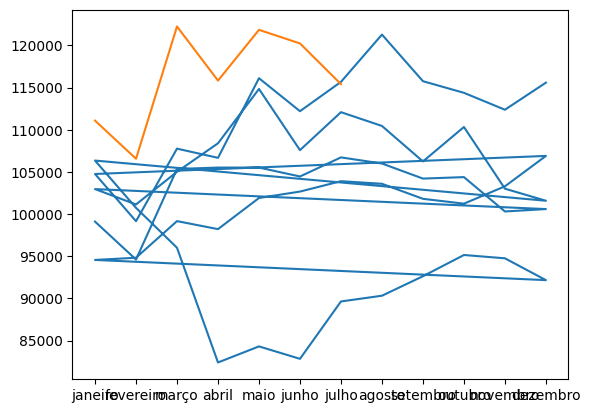

In [ ]:
plt.plot(train_data['mes_processamento'], y_train, label='Treinamento')
plt.plot(test_data['mes_processamento'], test_data['internacoes'], label='Real')

### Cria uma sequência de datas mensais para os próximos 6 meses a partir de julho de 2023

In [ ]:
forecast_dates = pd.to_datetime(['2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'])

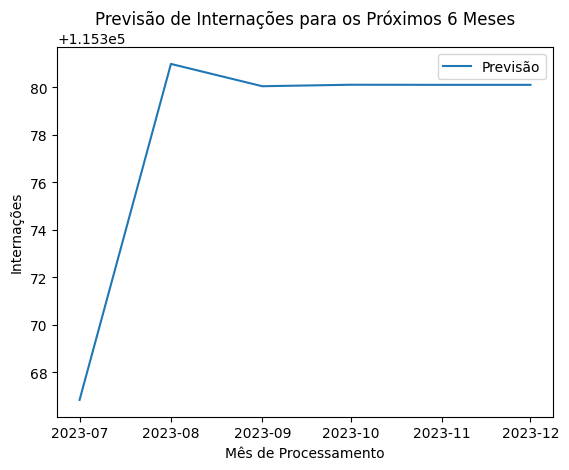

In [ ]:
plt.plot(forecast_dates, forecast, label='Previsão')
plt.xlabel('Mês de Processamento')
plt.ylabel('Internações')
plt.title('Previsão de Internações para os Próximos 6 Meses')
plt.legend()
plt.show()

##Técnicas de visualização dos dados

###Gráfico de Linhas com várias séries temporais

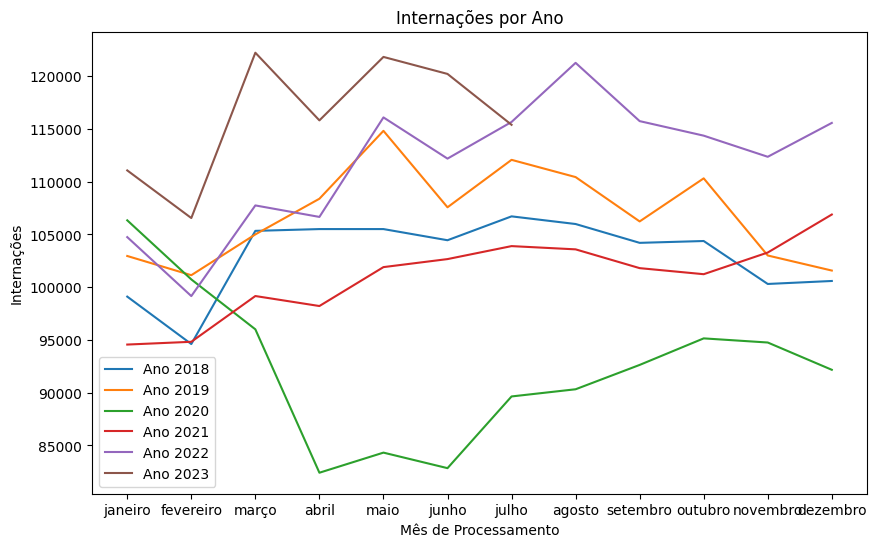

In [ ]:
plt.figure(figsize=(10, 6))
for year in range(2018, 2024):
    data_year = data[data['ano_processamento'] == year]
    plt.plot(data_year['mes_processamento'], data_year['internacoes'], label=f'Ano {year}')
plt.xlabel('Mês de Processamento')
plt.ylabel('Internações')
plt.title('Internações por Ano')
plt.legend()
plt.show()


###Gráfico de Dispersão com Correlação

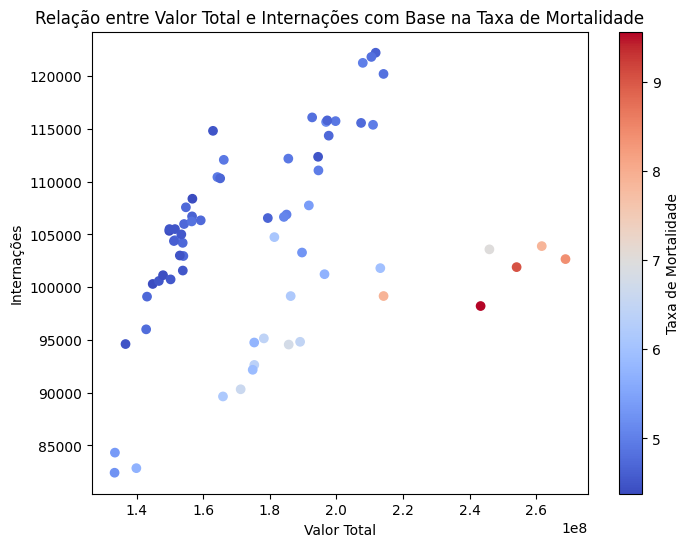

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['valor_total'], data['internacoes'], c=data['taxa_mortalidade'], cmap='coolwarm')
plt.xlabel('Valor Total')
plt.ylabel('Internações')
plt.title('Relação entre Valor Total e Internações com Base na Taxa de Mortalidade')
plt.colorbar(label='Taxa de Mortalidade')
plt.show()


###Gráfico de Pizza Explodido

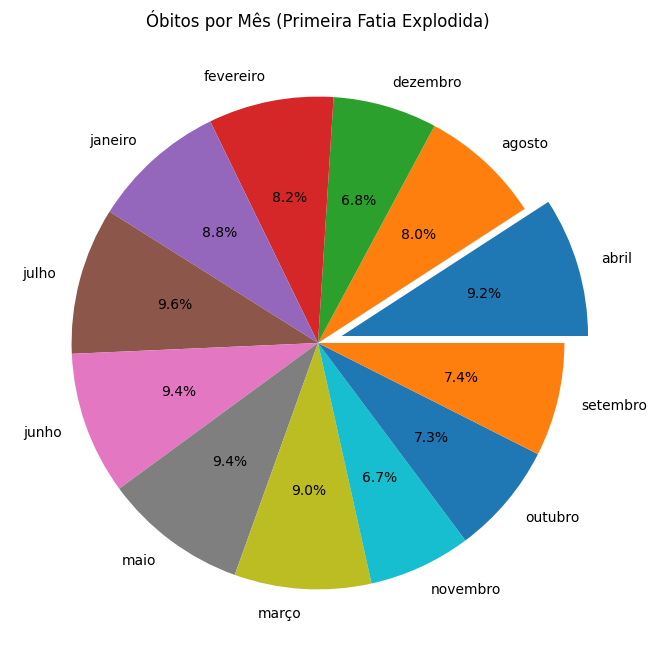

In [ ]:

month_obitos = data.groupby('mes_processamento')['obitos'].sum()

# Explode a primeira fatia (índice 0)
explode = [0.1 if i == 0 else 0 for i in range(len(month_obitos))]

plt.figure(figsize=(8, 8))
plt.pie(month_obitos, labels=month_obitos.index, autopct='%1.1f%%', explode=explode)
plt.title('Óbitos por Mês (Primeira Fatia Explodida)')
plt.show()


###Histograma

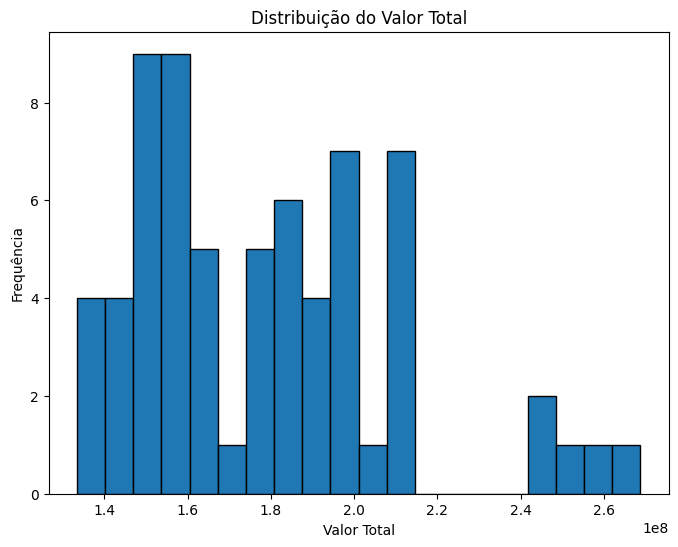

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['valor_total'], bins=20, edgecolor='k')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.title('Distribuição do Valor Total')
plt.show()


###Box Plot

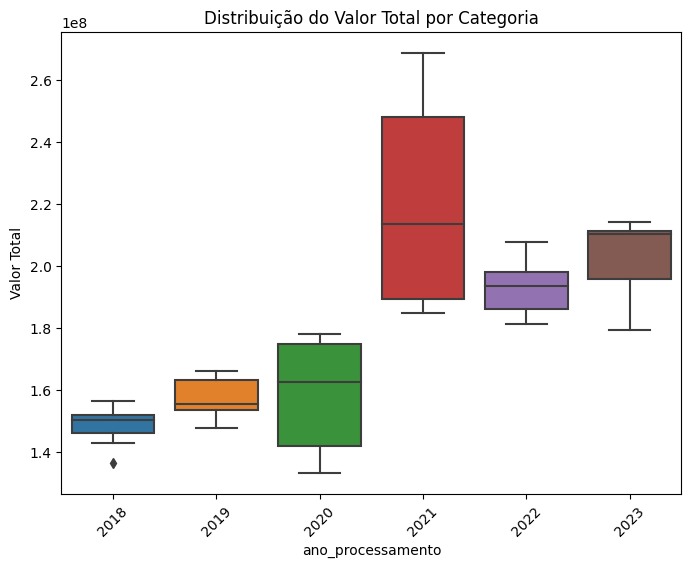

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ano_processamento', y='valor_total', data=data)
plt.xlabel('ano_processamento')
plt.ylabel('Valor Total')
plt.title('Distribuição do Valor Total por ano de processamento')
plt.xticks(rotation=45)
plt.show()


###Mapa Calor

<ipython-input-35-c6c02c7c5262>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


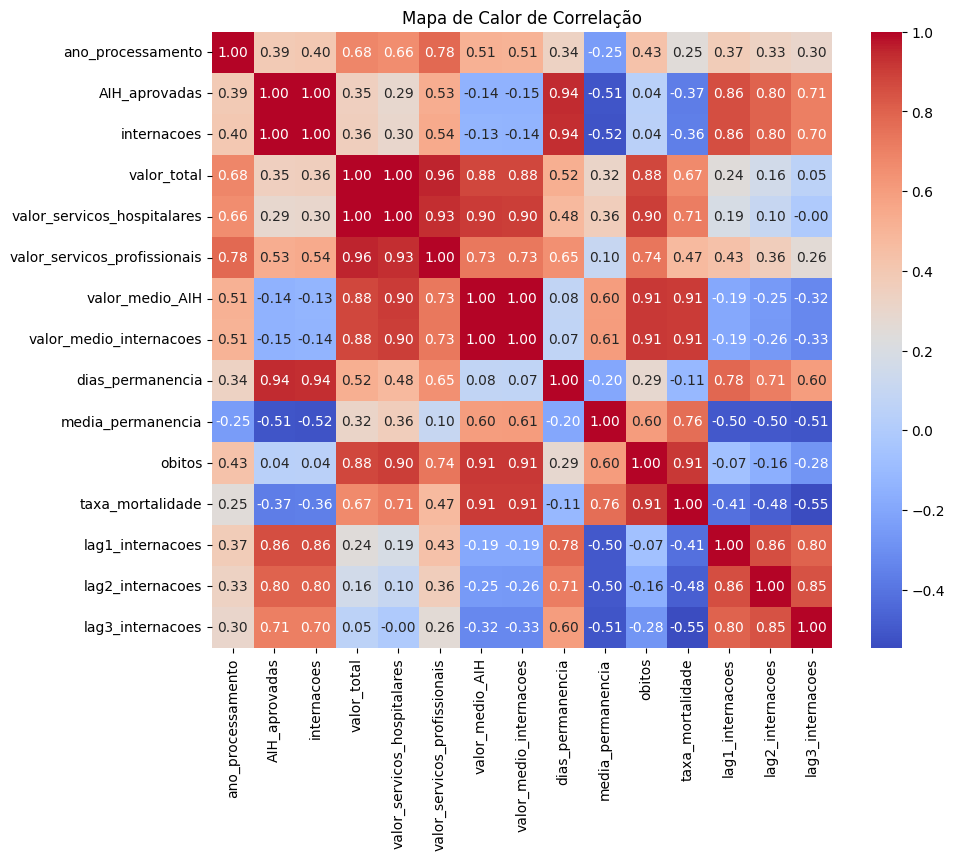

In [ ]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()


###Gráfico de Barras Agrupado

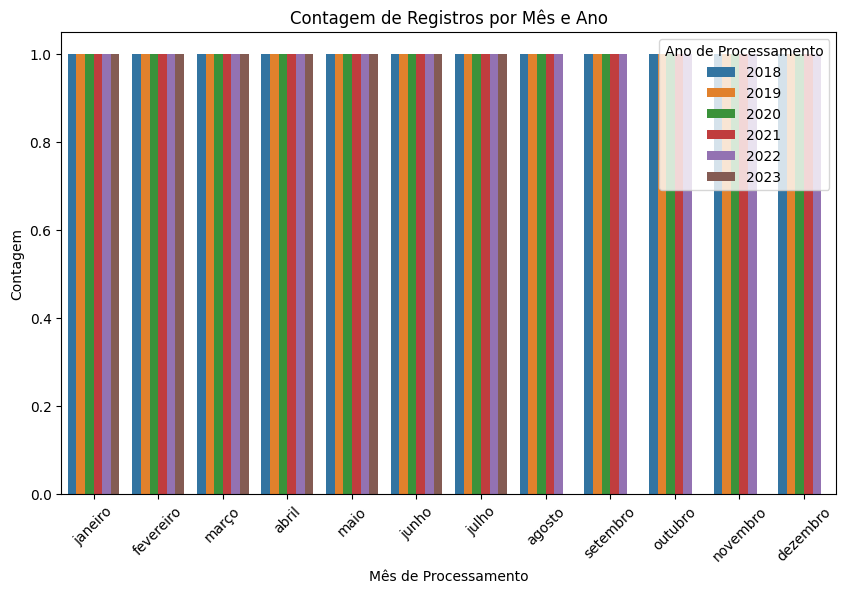

In [52]:

plt.figure(figsize=(10, 6))
sns.countplot(x='mes_processamento', hue='ano_processamento', data=data)
plt.xlabel('Mês de Processamento')
plt.ylabel('Contagem')
plt.title('Contagem de Registros por Mês e Ano')
plt.legend(title='Ano de Processamento')
plt.xticks(rotation=45)
plt.show()
